In [3]:
# import stac
# import numpy as np
# from rasterio.windows import Window
import matplotlib as mpl
import matplotlib.pyplot as plt

from eocube import DataCube, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"

In [12]:
import eocube

eocube?

In [5]:
eocube_service = DataCube()

In [3]:
print(eocube_service.getCollections())

['S2_MSI_L2_SR_LASRC-1', 'S2_MSI_L2_SR_6SV1-1', 'LC8SR-1', 'MOD13Q1-6', 'MYD13Q1-6', 'S2_10_16D_STK-1', 'S2-SEN2COR_10_16D_STK-1', 'S2_10-1', 'CB4MUX_20-1', 'CB4MUX_20_1M_STK-1', 'LC8_30-1', 'LC8_30_16D_STK-1', 'CB4_20_1M_STK-1', 'CB4_64_16D_STK-1', 'CB4_64-1', 'CB4-MUX-L4-SR-CMPAC-COG-1', 'CB4A-MOSAIC-PARAIBA_55_3M_STK-1', 'S2-MOSAIC-PARAIBA_10_3M_STK-1', 'CB4-MOSAIC-BRAZIL_64_3M_STK-1', 'KD_S2_20M_VISBANDS_CURUAI-1', 'LCC_S2_10_1M_STK_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_PA-SPC-AC-NA-1', 'LCC_L8_30_1M_STK_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1']


In [4]:
collection = input("Collection: ")
print(eocube_service.getDescription(collection).get('descriptions')[0].get('description'))

Collection: CB4_64-1
The CB4_64 datacube provides CBERS-4 (AWFI) Surface Reflectance (SR) images mosaicked using Brazil Data Cube BDC_LG grid. According to the INPE's web site, CBERS is a cooperative program of China and Brazil containing 4 sensors (MUX, PAN, IRS and AWFI). The AWFI camera contains four spectral bands (blue, green, red and NIR), with a swath of 866km and a revisit period of 5 days. For more information on CBERS-4, please, see http://www.cbers.inpe.br/sobre/cbers3-4.php. This dataset was processed and made available by the Brazil Data Cube project, a component of the Environmental Monitoring of Brazilian Biomes project, funded by the Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES) and the Foundation for Science, Technology and Space Applications (FUNCATE) no. 17.2.0536.1.


In [17]:
bbox = [-56.5009689, -10.7164420, -56.3526535, -10.8238641] # Mato Grosso
# bbox = [-46.01348876953125, -23.08478515994374, -45.703125, -23.34856015148709] # Interior de SP São José

items = eocube_service.getItems(
    collections=["CB4_64_16D_STK-1"],
    bbox=bbox,
    start_date="2018-08-01",
    end_date="2019-07-31"
)

In [18]:
print(items[0]['assets']['BAND13']['href'])

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/020023/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_020023_2019-07-28_2019-08-12_BAND13.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV


In [19]:
eocube_service.createCube()

True

In [24]:
list(eocube_service.getCube()[0].bands.keys())

['blue',
 'green',
 'red',
 'nir',
 'ClearOb',
 'quality',
 'evi',
 'ndvi',
 'Provenance',
 'TotalOb']

In [56]:
raster = None
for image in eocube_service.getCube():
    if '2019-07-28T00:00:00' == image.item.get("properties").get("datetime"):
        raster = image
raster

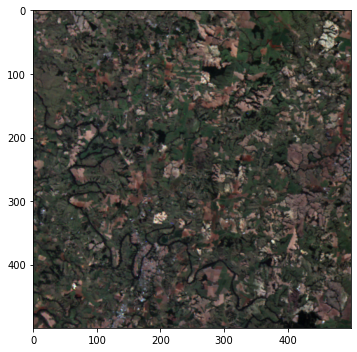

In [57]:
plt.figure(figsize=(10, 5))
plt.imshow(raster.getRGB())
plt.tight_layout()

plt.show()

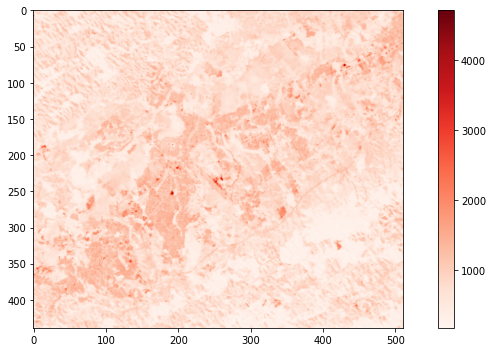

In [58]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(
    raster.getBand("red"),
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

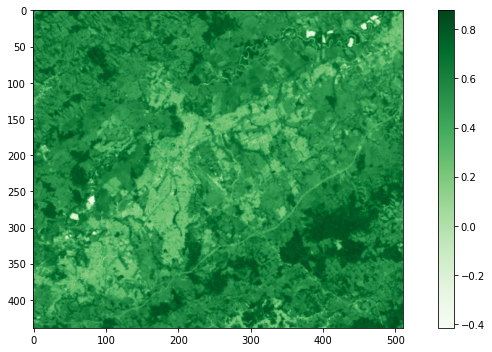

In [59]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(
    raster.getNDVI(),
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

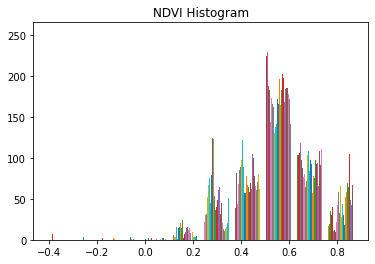

In [13]:
plt.title("NDVI Histogram")
plt.hist(raster.getNDVI())
plt.show()